In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import datasets 

df=pd.read_csv(r"C:\Users\Sitaram\Desktop\Ashish\Projects\Student_Performance\students.csv")
rd = df[['gender','StageID','SectionID','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays','Class']]
rd[:10]  # Showing alignment of first 10 data 

,gender,StageID,SectionID,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,lowerlevel,A,Father,15,16,2,20,Under-7,M
1,M,lowerlevel,A,Father,20,20,3,25,Under-7,M
2,M,lowerlevel,A,Father,10,7,0,30,Above-7,L
3,M,lowerlevel,A,Father,30,25,5,35,Above-7,L
4,M,lowerlevel,A,Father,40,50,12,50,Above-7,M
5,F,lowerlevel,A,Father,42,30,13,70,Above-7,M
6,M,MiddleSchool,A,Father,35,12,0,17,Above-7,L
7,M,MiddleSchool,A,Father,50,10,15,22,Under-7,M
8,F,MiddleSchool,A,Father,12,21,16,50,Under-7,M
9,F,MiddleSchool,B,Father,70,80,25,70,Under-7,M


In [7]:
rd.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


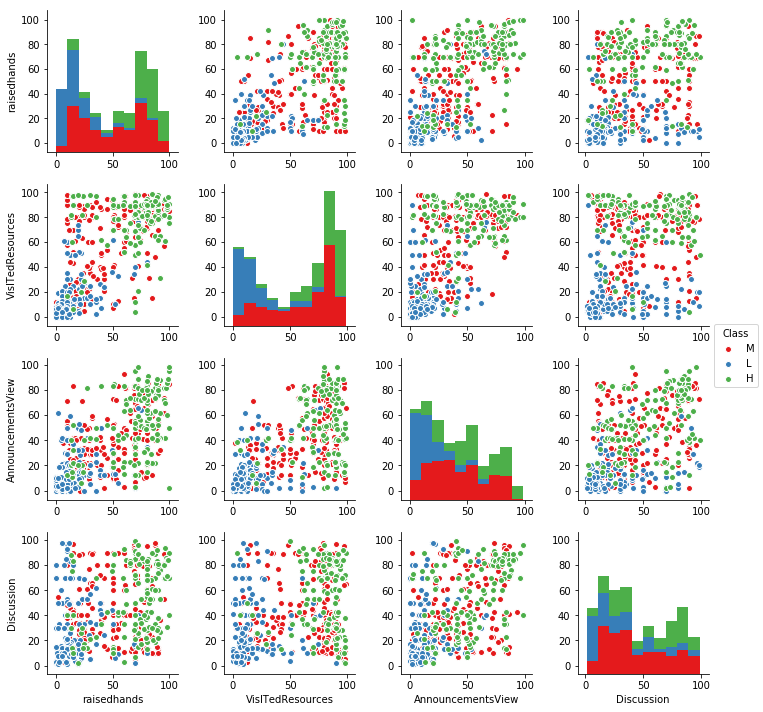

In [14]:
sb.pairplot(rd,hue='Class',palette='Set1');

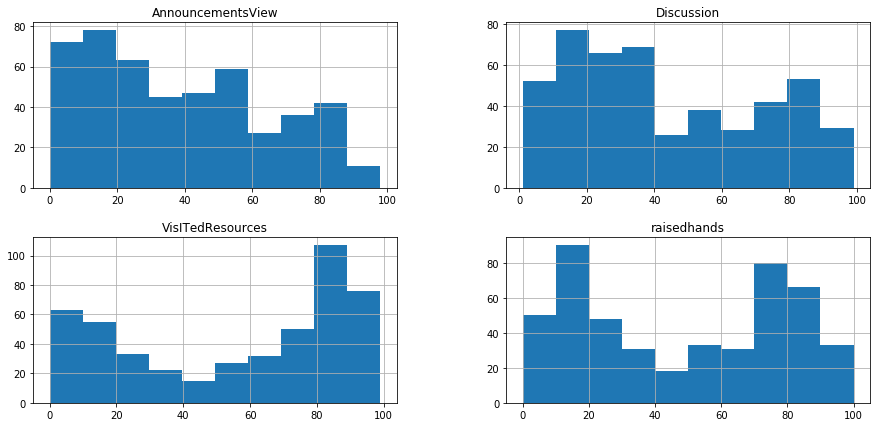

In [9]:
rd.hist(figsize=(15, 7));

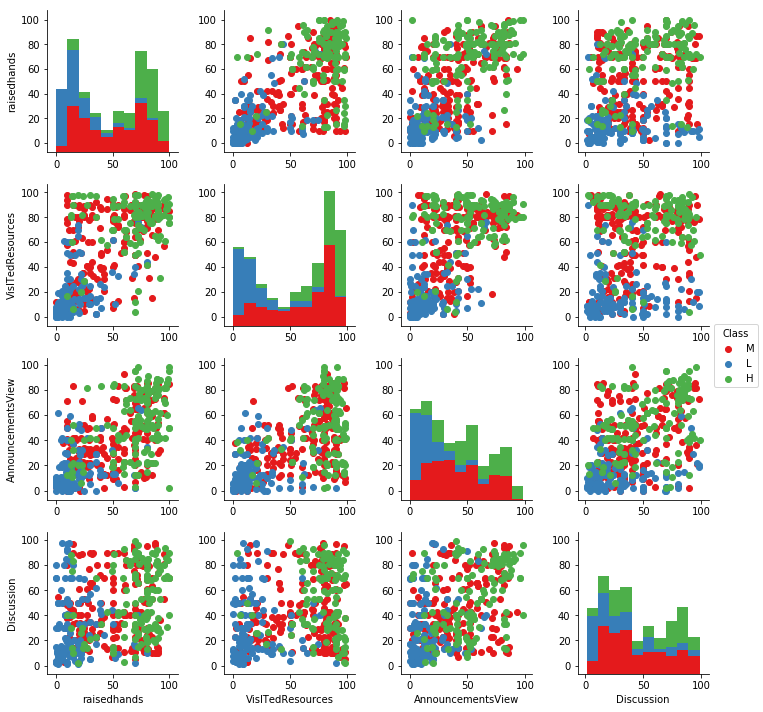

In [10]:
g = sb.PairGrid(rd, hue="Class",palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

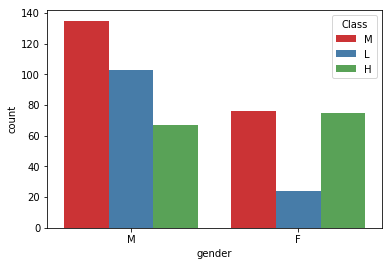

In [11]:
sb.countplot(data=rd,x='gender',hue='Class',palette='Set1');

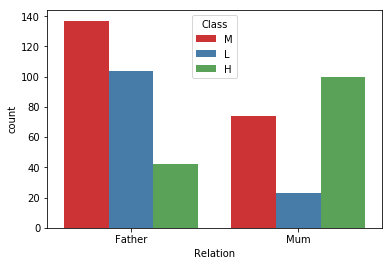

In [12]:
sb.countplot(data=rd,x='Relation',hue='Class',palette='Set1');

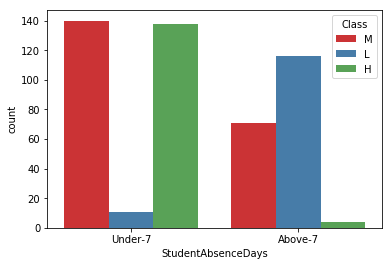

In [13]:
sb.countplot(data=rd,x='StudentAbsenceDays',hue='Class',palette='Set1');

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

in_size = 16
hidden_size = 20
out_size = 3
tot = 400
w1,w2,b1,b2 =0,0,0,0


def data_process(rd):

    gen = [[int(i=='M'),int(i=='F')] for i in rd['gender']]
    stage_id = [[int(i=='lowerlevel'),int(i=='MiddleSchool'),int(i=='HighSchool')] for i in rd['StageID']]
    SectionID = [[int(i=='A'),int(i=='B'),int(i=='C')] for i in rd['SectionID']]
    Relation = [[int(i=='Father'),int(i=='Mum')] for i in rd['Relation']]
    rais_h = [[i] for i in rd['raisedhands']]
    visit_rc = [[i] for i in rd['VisITedResources']]
    ana = [[i] for i in rd['AnnouncementsView']]
    dis = [[i] for i in rd['Discussion']]
    abs = [[10] if i=='Above-7' else [4] for i in rd['StudentAbsenceDays']]

    x = []
    for i in range(rd.shape[0]):
        xx = gen[i]+stage_id[i]+SectionID[i]+Relation[i]+rais_h[i]+visit_rc[i]+ana[i]+dis[i]+abs[i]
        x.append(xx)
    return x


def sigmod(z):
    return 1/(1+np.exp(-z))

def sigmoprime(z):
    return z*(1-z)

def linear_cost(x,y,th):

    htx = x.dot(th.T)
    sum = np.power((htx - y), 2)
    sum = np.sum(sum)
    return sum / (2 * len(x))


def predict(x,th):
    return x.dot(th.T)


def acuracy(ans,Y):
    pred = [[int(max(ans[i]) == ans[i][0]), int(max(ans[i]) == ans[i][1]), int(max(ans[i]) == ans[i][2])] for i in
          range(len(Y))]
    pred = np.array(pred)

    cnt = 0
    for i in range(len(Y)):
        cnt += np.array_equal(pred[i], Y[i])
    print('Total match -', cnt, 'out of', len(Y))
    print('accuracy =', cnt / len(Y) * 100)


def acuracy_neural(p_out,Y):

    p_out = np.round(p_out)
    cnt = 0
    for i in range(len(Y)):
        cnt += np.array_equal(p_out[i], Y[i])
    print('Total match -',cnt,'out of',len(Y))
    print('accuracy =',cnt / len(Y) * 100)


def gradientDescent_linear(X, y, theta,epoch,alpha):
    for i in range(epoch):
        dif = X.dot(theta.T) - y

        df =[0,0,0]
        df[0] = [[i] for i in dif[:,0]]
        df[1] = [[i] for i in dif[:,1]]
        df[2] = [[i] for i in dif[:,2]]
        df = np.array(df)

        theta[0] = theta[0] - (alpha / len(X)) * np.sum(X * df[0] , axis=0)
        theta[1] = theta[1] - (alpha / len(X)) * np.sum(X * df[1] , axis=0)
        theta[2] = theta[2] - (alpha / len(X)) * np.sum(X * df[2] , axis=0)
    return theta



def linear_regression(train_data,Y,test_data,test_y,epoch = 10000,alpha = .1):

    theta = np.zeros((3, in_size))

    # trainning
    slop = gradientDescent_linear(train_data, Y, theta,epoch,alpha)
    ans = predict(train_data, slop)

    print("Linear Regression")
    print("---------------------------")
    print("Cost : ", linear_cost(train_data, Y, slop))
    print("\n\nTraining data accuracy")
    print("---------------------------")
    acuracy(ans, Y)
    print("---------------------------")

    # testing
    print("\n\nTesting data accuracy")
    print("---------------------------")
    ans = predict(test_data, slop)
    acuracy(ans, test_y)
    print("---------------------------\n\n")


def gradientDescent_logistic(X, y, theta,epoch,alpha):
    for i in range(epoch):
        dif = sigmod(X.dot(theta)) - y
        grad = np.dot(X.T, dif) / y.shape[0]
        theta = theta - alpha*grad
    return theta


def logistic_cost(x,y,th):
    htx = sigmod(x.dot(th))
    vv = -y * np.log(htx) - (1 - y) * np.log(1 - htx)
    return vv.mean()

def logistic_regression(train_data,Y,test_data,test_y,epoch = 10000,alpha = .1):

    theta = np.zeros((in_size, 3))
    
    # trainning
    slop = gradientDescent_logistic(train_data, Y, theta,epoch,alpha)
    ans = predict(train_data, slop.T)

    print("Logistic Regression")
    print("--------------------------")
    print("Cost : ", logistic_cost(train_data, Y, slop))
    print("\n\nTraining data accuracy")
    print("--------------------------")
    acuracy(ans, Y)
    print("--------------------------")

    # testing
    print("\n\nTesting data accuracy")
    print("--------------------------")
    ans = predict(test_data, slop.T)
    acuracy(ans, test_y)
    print("--------------------------\n\n")


def forward(X):
    global w1,w2,a2,a3,b1,b2
    z2 = np.dot(X,w1)+b1
    a2 = sigmod(z2)

    z3 = np.dot(a2, w2)+b2
    a3 = sigmod(z3)
    return a3


def backword(X,out,Y,alpha):
    global w1,w2,b1,b2

    del3 = (Y-out)*sigmoprime(out)
    del2 = del3.dot(w2.T)*sigmoprime(a2)
    w1 += X.T.dot(del2)*alpha
    w2 += a2.T.dot(del3)*alpha
    b1 += np.sum(del2,axis=0,keepdims=True)*alpha
    b2 += np.sum(del3,axis=0,keepdims=True)*alpha



def train(X,Y,alpha):
    out = forward(X)
    backword(X,out,Y,alpha)


def neural_network(train_data,Y,test_data,test_y,epoch = 10000,alpha = .1):
    global w1, w2, b1, b2
    
    # removing first column of 1's
    train_data = np.delete(train_data,np.s_[:1],axis=1)
    test_data = np.delete(test_data,np.s_[:1],axis=1)
    
    # initializing weight & bias
    w1 = np.random.randn(in_size-1, hidden_size)
    w2 = np.random.randn(hidden_size, out_size)
    b1 = np.random.randn(1, hidden_size)
    b2 = np.random.randn(1, out_size)

    for i in range(epoch):
        train(train_data,Y,alpha)

    ans = forward(train_data)

    print("Neural Network")
    print("--------------------------")
    print("Cost : ", np.mean(np.square(Y - ans)))
    print("\n\nTraining data accuracy")
    print("--------------------------")
    acuracy_neural(ans, Y)
    print("--------------------------")

    # testing
    print("\n\nTesting data accuracy")
    print("--------------------------")
    ans = forward(test_data)
    acuracy_neural(ans, test_y)
    print("--------------------------\n\n")

    
def main():

    # Data processing part

    df=pd.read_csv(r"C:\Users\Sitaram\Desktop\Ashish\Projects\Student_Performance\students.csv")
    rd = df[['gender','StageID','SectionID','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays','Class']]


    # X - data
    total_data = data_process(rd)
    train_data = total_data[:tot]
    test_data = total_data[tot:]

    # Y - data
    total_Y = [[int(i=='L'),int(i=='M'),int(i=='H')] for i in rd['Class']]  # One hot encoded data
    Y = total_Y[:tot]
    test_y = total_Y[tot:]

    scale_ara = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 100, 100, 100, 100, 10], dtype=float) # array to scale the data

    # Scaled data
    train_data = np.array(train_data,dtype=float)/scale_ara
    test_data= np.array(test_data,dtype=float)/scale_ara

    # concatenation of vector of 1's
    train_data = np.concatenate([np.ones((tot,1)),train_data],1)
    test_data = np.concatenate([np.ones((480-tot,1)),test_data],1)

    Y = np.array(Y,dtype=float)
    test_y = np.array(test_y,dtype=float)

    # Analysis function
    linear_regression(train_data,Y,test_data,test_y,epoch=1000)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')

    logistic_regression(train_data,Y,test_data,test_y,alpha=.3)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')
    
    neural_network(train_data,Y,test_data,test_y)

    
if __name__ == "__main__":
    main()

Linear Regression
---------------------------
Cost :  0.215028937363


Training data accuracy
---------------------------
Total match - 284 out of 400
accuracy = 71.0
---------------------------


Testing data accuracy
---------------------------
Total match - 48 out of 80
accuracy = 60.0
---------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Logistic Regression
--------------------------
Cost :  0.392605814224


Training data accuracy
--------------------------
Total match - 302 out of 400
accuracy = 75.5
--------------------------


Testing data accuracy
--------------------------
Total match - 59 out of 80
accuracy = 73.75
--------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Neural Network
--------------------------
Cost :  0.024067724905


Training data accuracy
--------------------------
Total match - 379 out of 400
accuracy = 94.75
--------------------------


Testing data accuracy
--------------------------
Total